## About the Sberbank Russia Dataset
Housing costs demand a significant investment from both consumers and developers. And when it comes to planning a budget—whether personal or corporate—the last thing anyone needs is uncertainty about one of their biggets expenses. Sberbank, Russia’s oldest and largest bank, helps their customers by making predictions about realty prices so renters, developers, and lenders are more confident when they sign a lease or purchase a building.

Although the housing market is relatively stable in Russia, the country’s volatile economy makes forecasting prices as a function of apartment characteristics a unique challenge. Complex interactions between housing features such as number of bedrooms and location are enough to make pricing predictions complicated. Adding an unstable economy to the mix means Sberbank and their customers need more than simple regression models in their arsenal.

In this competition, Sberbank is challenging Kagglers to develop algorithms which use a broad spectrum of features to predict realty prices. Competitors will rely on a rich dataset that includes housing data and macroeconomic patterns. An accurate forecasting model will allow Sberbank to provide more certainty to their customers in an uncertain economy.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("train/train.csv", parse_dates=['timestamp'])

In [3]:
pd.set_option('display.max_columns', 500) #This is a very handy tool for large column datasets
data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [35]:
data.shape

(30471, 292)

In [11]:
#ToDO: Get the the dataframe of datatype
data_type = data.dtypes.reset_index() #Reset index gives an index to the dataframe
data_type.columns=["columns", "data_type"]
data_type.head()

data_type.groupby('data_type').aggregate('count').reset_index()

,columns,data_type
0,id,int64
1,timestamp,datetime64[ns]
2,full_sq,int64
3,life_sq,float64
4,floor,float64


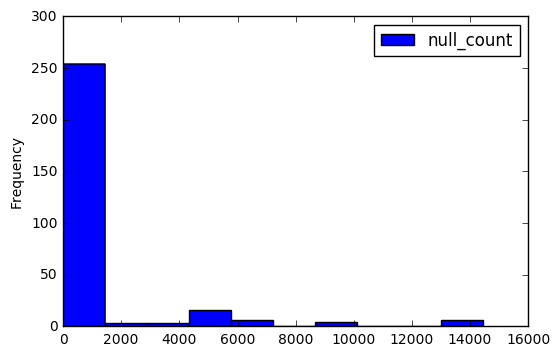

In [34]:
#Values of Null values per column
data_null = data.isnull().sum().reset_index()
data_null.head()
data_null.columns = ["column", "null_count"]
data_null.plot(data_null.null_count.values, kind="hist")

250 columns contains null of 1500 - 1800; What to do with this, should i just remove the observations for those ones
That's removing 1800 observations

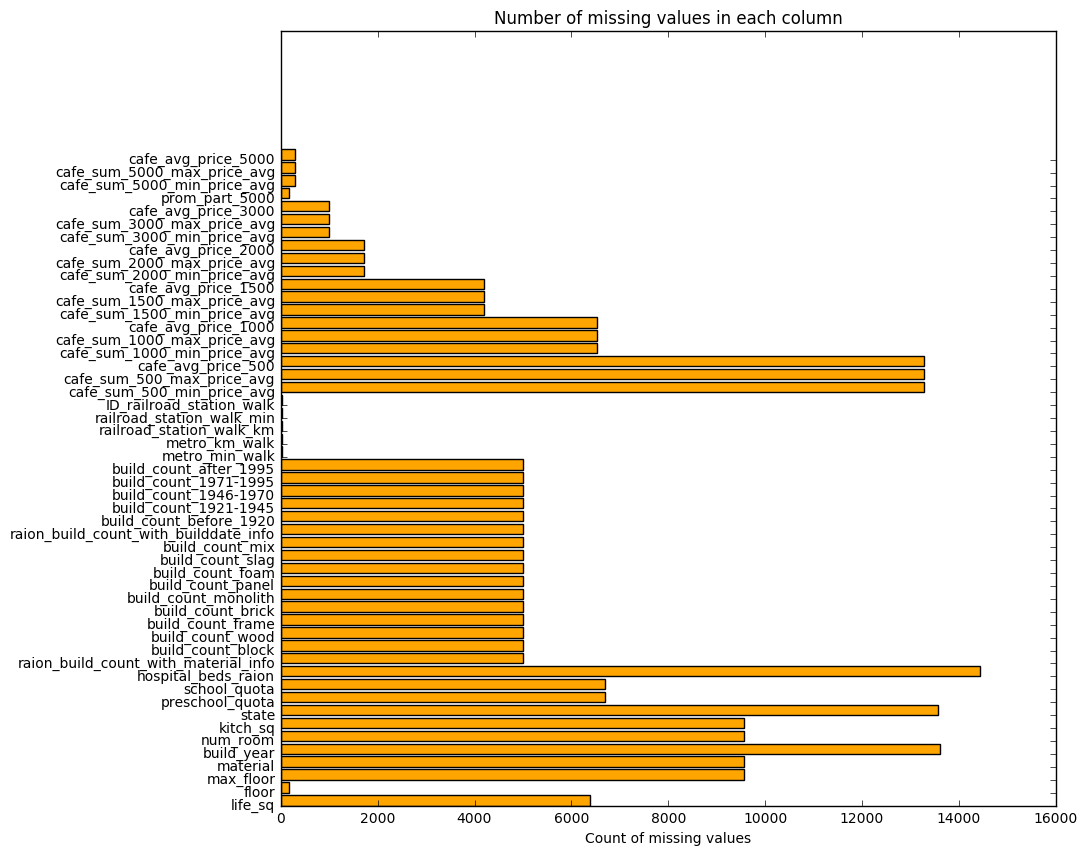

In [39]:
data_null = data_null[data_null["null_count"] > 0]
ind = np.arange(data_null.shape[0])
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(ind, data_null.null_count.values, color='orange')
ax.set_yticks(ind)
ax.set_yticklabels(data_null.column.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [40]:
#51 Columns with null values
data_null.column.count()

51

In [49]:
#It's a good canditate to drop and train with about 241 Columns now...
null_list = data_null.column.tolist()

#make a copy of the data befor going forward
data_copy = data.copy()

In [54]:
data_copy_notnull = data_copy.drop([null for null in null_list], axis=1)
data_copy_notnull.isnull().any()

id                                       False
timestamp                                False
full_sq                                  False
product_type                             False
sub_area                                 False
area_m                                   False
raion_popul                              False
green_zone_part                          False
indust_part                              False
children_preschool                       False
preschool_education_centers_raion        False
children_school                          False
school_education_centers_raion           False
school_education_centers_top_20_raion    False
healthcare_centers_raion                 False
university_top_20_raion                  False
sport_objects_raion                      False
additional_education_raion               False
culture_objects_top_25                   False
culture_objects_top_25_raion             False
shopping_centers_raion                   False
office_raion 

In [62]:
#Check if any of the values is null
data_copy_notnull.isnull().values.any()

False

In [ ]:
#Reapeat count of all the datatypes available
#Plot with seaborne
#

In [63]:
new_data = data_copy_notnull.copy()

In [ ]:
#Use xcorr to plot correlation matrix

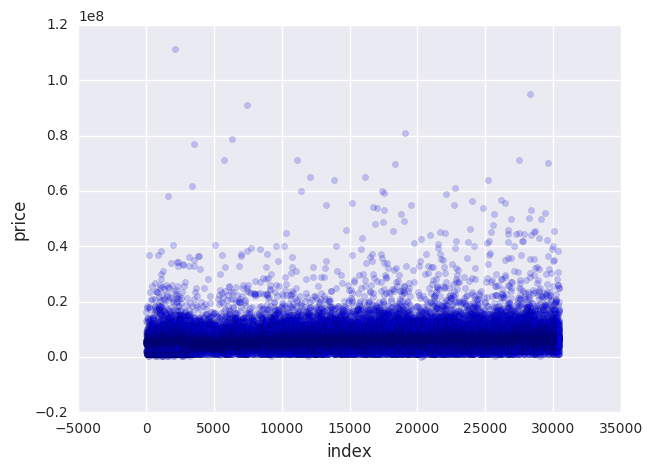

In [82]:
#split train and test
#Use both Stratified Split and Normal split since plotting t
color = sns.diverging_palette
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(range(new_data.shape[0]), new_data.price_doc, alpha=0.2)
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

#I see couples of outliear here though

In [86]:
#Let's split the data before going forward
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(new_data, test_size=0.2, random_state=42)
len(train_set)

24376

In [89]:
#Let's build correlation matrix
new_data_corr = new_data.corr()
new_data_corr['price_doc'].sort_values(ascending=False)

price_doc                         1.000000
full_sq                           0.341840
sport_count_5000                  0.294864
sport_count_3000                  0.290651
trc_count_5000                    0.289371
sport_count_2000                  0.278056
office_sqm_5000                   0.269977
trc_sqm_5000                      0.268072
sport_count_1500                  0.258376
sport_objects_raion               0.252794
trc_count_3000                    0.242068
cafe_count_5000_price_1000        0.240464
cafe_count_5000_price_1500        0.232612
cafe_count_5000                   0.231546
cafe_count_5000_na_price          0.230055
cafe_count_5000_price_500         0.226952
office_sqm_3000                   0.226780
cafe_count_5000_price_2500        0.225566
trc_sqm_3000                      0.225533
office_count_5000                 0.219249
office_sqm_2000                   0.216495
cafe_count_5000_price_high        0.214327
church_count_5000                 0.213275
cafe_count_

In [139]:
prep_train = train_set.drop(['price_doc', 'timestamp'], axis=1)
y_label = train_set['price_doc'].copy()

In [140]:
data_type = prep_train.dtypes.reset_index() #Reset index gives an index to the dataframe
data_type.columns=["columns", "data_type"]
data_type.head()

data_type.groupby('data_type').aggregate('count').reset_index()

,data_type,columns
0,int64,156
1,float64,68
2,object,15


In [141]:
#Found using select_dtypes very handy
prep_train_num = prep_train.select_dtypes(include=["int64", "float64"])

#Use to validate
prep_train_num.astype('int64').values.any()

True

In [142]:
prep_train_obj = prep_train.select_dtypes(include=["object"])

In [143]:
#The Pipelined workflow
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import BaseEstimator, TransformerMixin

num_attributes = list(prep_train_num)
cat_attributes = list(prep_train_obj)

In [144]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelBinarizer().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelBinarizer().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [145]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attributes))
    ])

cat_pipeline = Pipeline([
        ('cat_binarizer', MultiColumnLabelEncoder(columns=cat_attributes))
    ])
    
full_pipeline = FeatureUnion(transformer_list=[
        ('num_pipeline', num_pipeline),
        ('cat_pipeline', cat_pipeline)
    ])

final_prep = full_pipeline.fit_transform(prep_train)

In [ ]:
#Train some model on the data
def display_scores(scores):
    print("Scores:", scores)
    print("Score_mean", scores.mean())
    print("Score_std", scores.std())

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor()
forest_reg.fit(final_prep, y_label)
forest_prediction = forest_reg.predict(final_prep)

In [148]:
from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(y_label, forest_prediction)
print("forest_rmse:", np.sqrt(forest_mse))

scores = cross_val_score(forest_reg, final_prep, y_label, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

forest_rmse: 1207534.79855
Scores: [ 2917539.23234551  3014145.02619452  2787905.56823557  2703520.49083934
  2736465.68603737  3025284.68915022  3556559.72187102  2878198.98137082
  2744507.76346393  2737262.50982985]
Score_mean 2910138.96693
Score_std 242512.904529


In [125]:
prep_test = test_set.drop('price_doc', axis=1)
final_test = full_pipeline.fit_transform(prep_test)

In [126]:
final_test.shape

(6095, 464)

In [ ]:
#To define my own that works with numpy array from DataFrameSelector
class MultiCategoryLabelEncoder(BaseEstimator, TransformerMixin):
    """
    Takes a numpy array
    """

In [121]:
?TransformerMixin